In [2]:
# Library

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [3]:
df_test = pd.read_csv("https://raw.githubusercontent.com/hamborgir/ML-AOL-Flight-Satisfaction/main/test.csv")
df_train = pd.read_csv("https://raw.githubusercontent.com/hamborgir/ML-AOL-Flight-Satisfaction/main/train.csv")

df_raw = pd.concat([df_train, df_test]).copy()

# Clean Dataset
# Dropping Missing Values
df_raw.dropna(inplace = True)

# Dropping Unnecessary Data
df_raw.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

## EDA

In [4]:
# numeric and categorical variables' name for EDA

label_nominal = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
label_ordinal = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
                 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
                 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
label_num = ['Age', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']

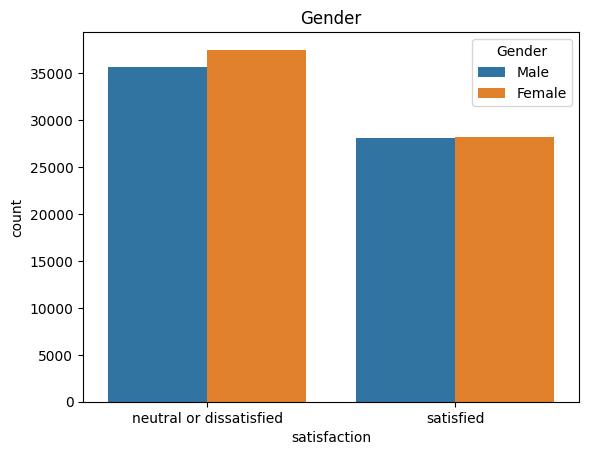

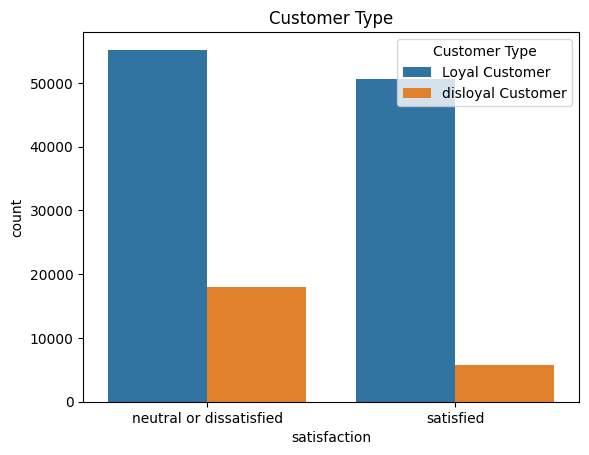

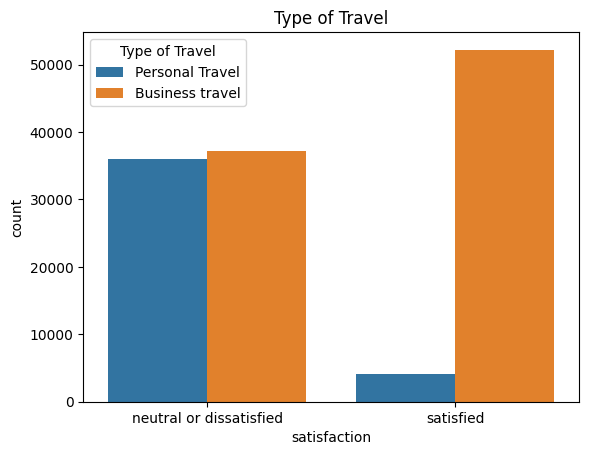

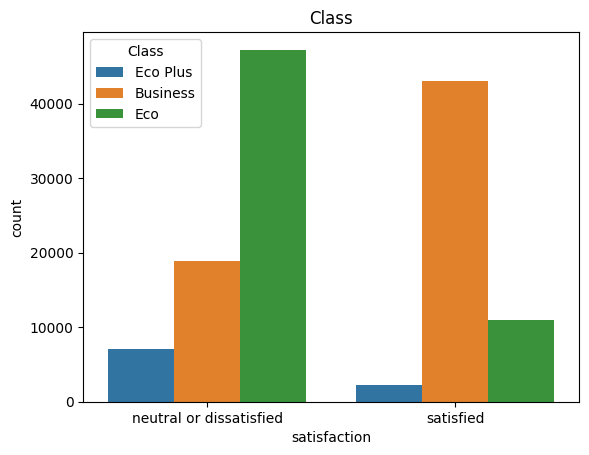

<Figure size 640x480 with 0 Axes>

In [5]:
for x in label_nominal[:-1]:
  sns.countplot(data = df_raw, x = 'satisfaction', hue = x).set_title(x)
  plt.figure()

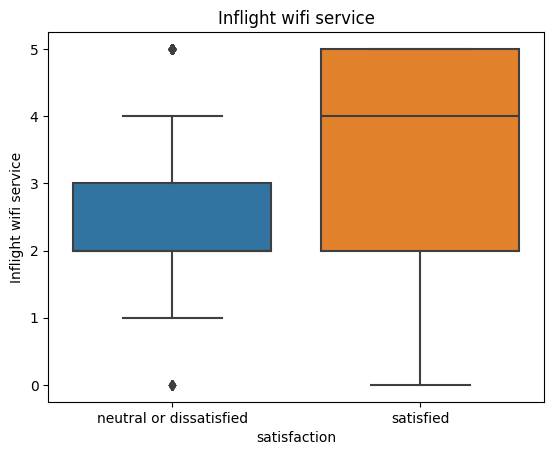

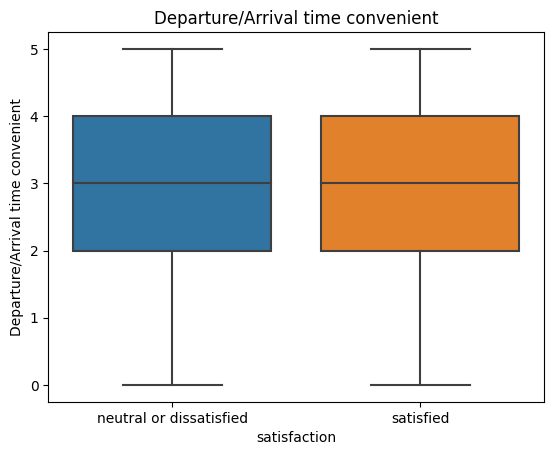

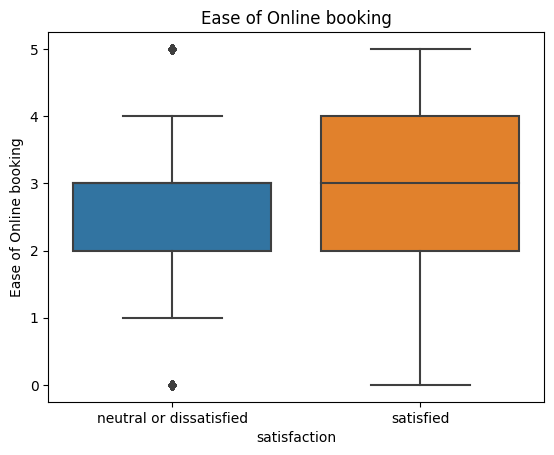

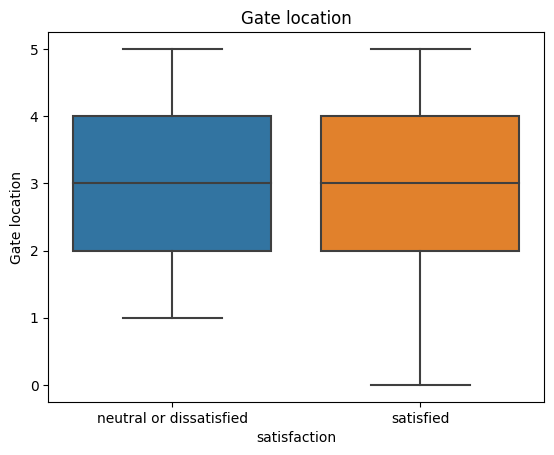

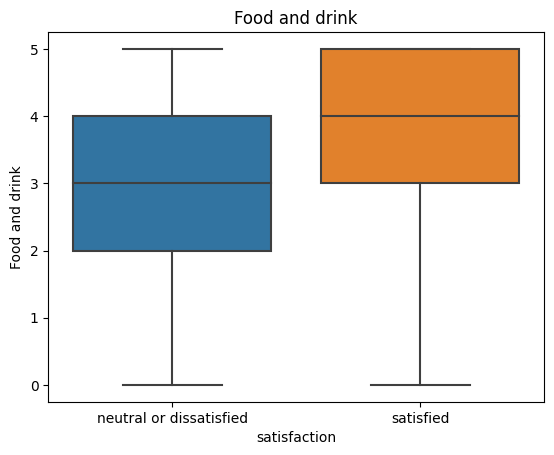

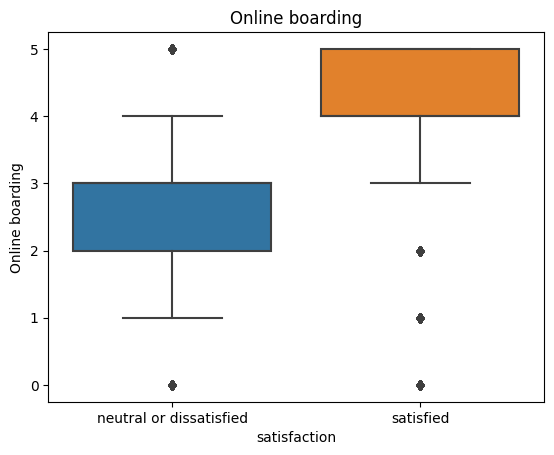

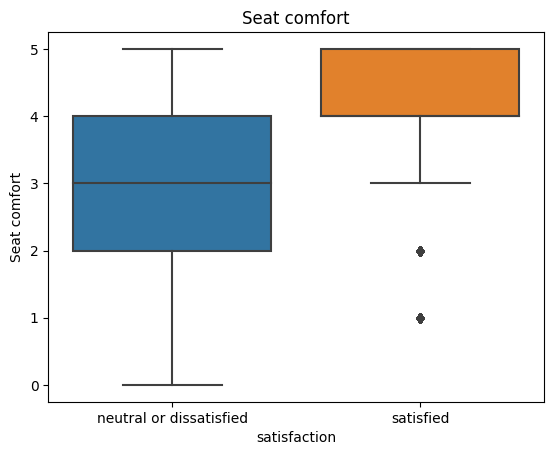

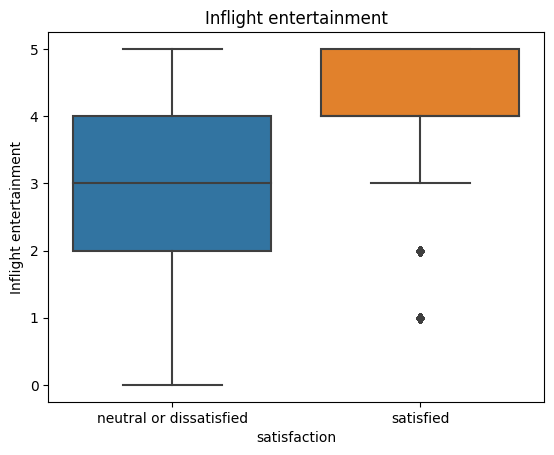

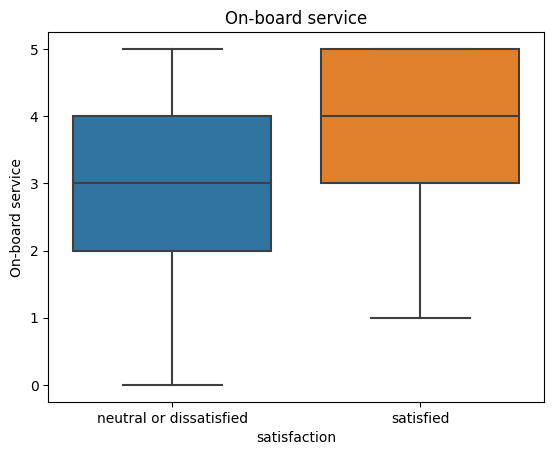

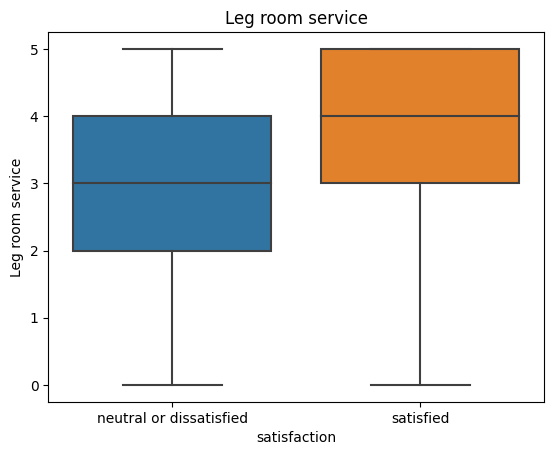

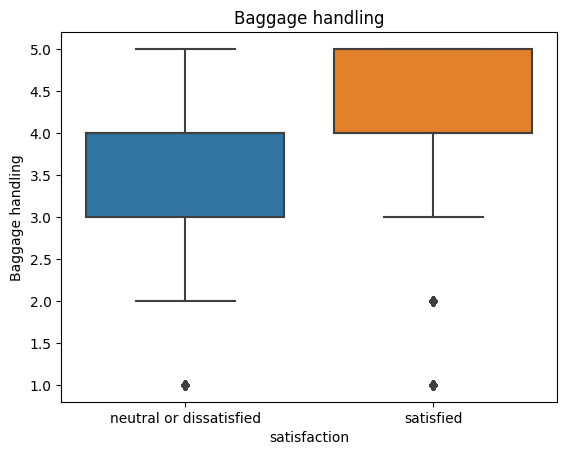

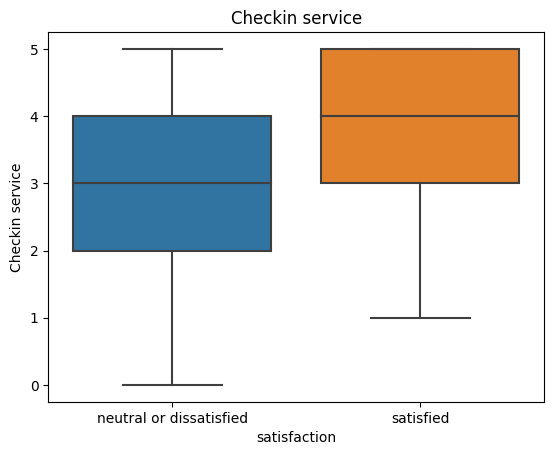

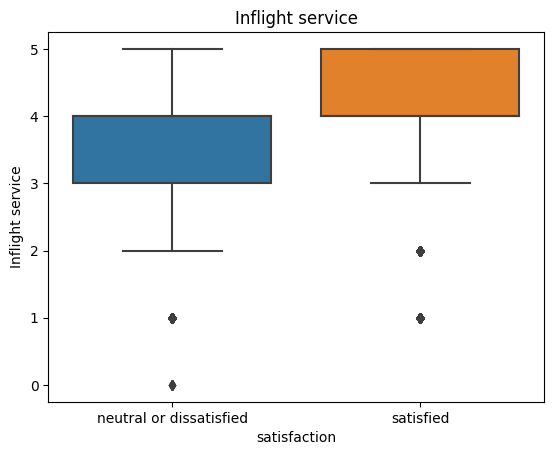

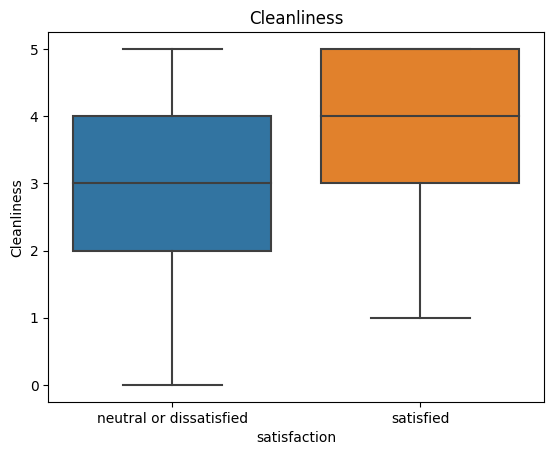

<Figure size 640x480 with 0 Axes>

In [6]:
for x in label_ordinal:
  sns.boxplot(data = df_raw, x = 'satisfaction', y = x).set_title(x)
  plt.figure()

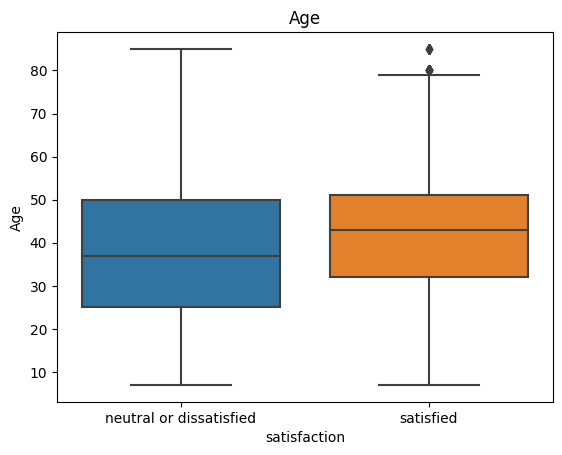

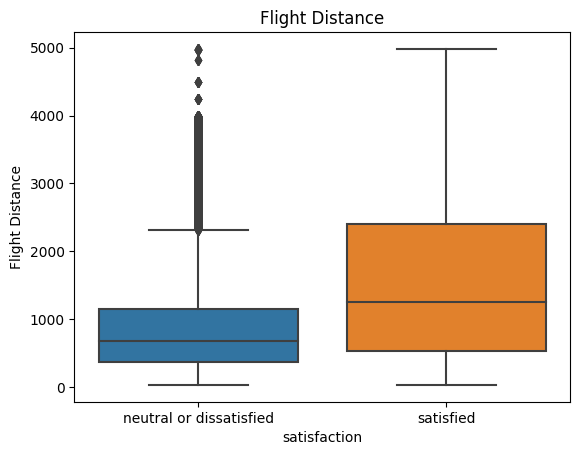

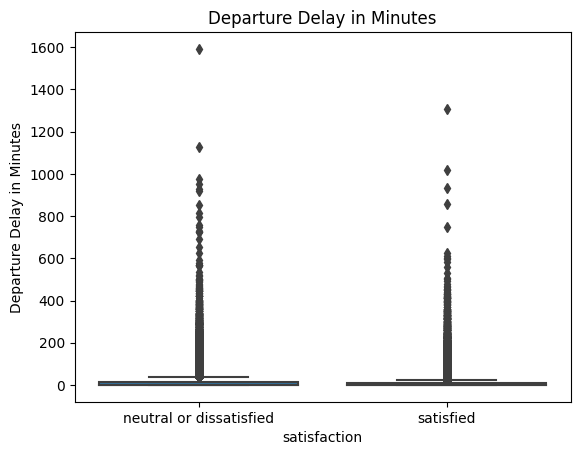

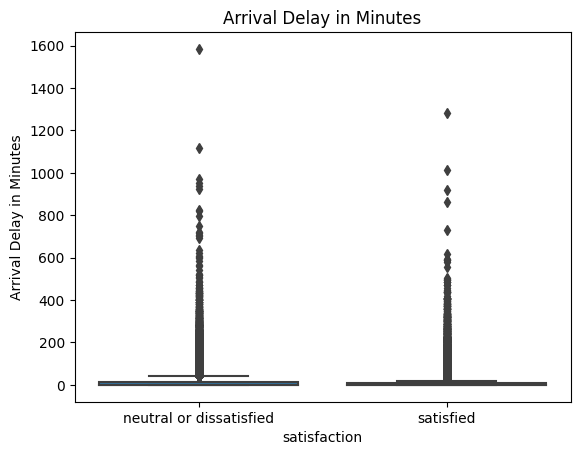

<Figure size 640x480 with 0 Axes>

In [7]:
for x in label_num:
  sns.boxplot(data = df_raw, x = 'satisfaction', y = x).set_title(x)
  plt.figure()

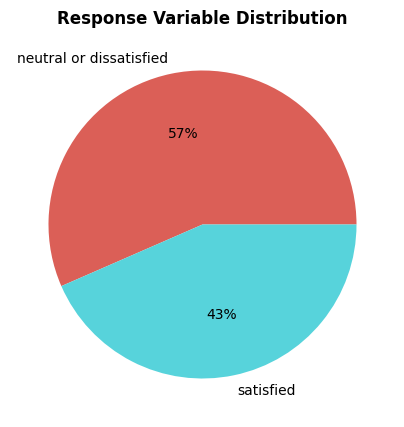

In [8]:
fig = plt.figure()

plt.pie(df_raw['satisfaction'].value_counts(), labels=df_raw['satisfaction'].value_counts().index,
        colors=sns.color_palette('hls', 2), autopct='%.0f%%')
fig.set_figwidth(5)
fig.set_figheight(5)
plt.title("Response Variable Distribution", weight = "bold")

plt.show()

## Pre-processing

In [9]:
# encoder function
def encode_delayed(x):
    if x > 0:
        return "Delayed"
    else:
        return "Not Delayed"

def encode_distance(x):
    if x > 3000:
        return "Long-haul Flight"
    elif x > 700:
        return "Mid-haul Flight"
    else:
        return "Short-haul Flight"

In [10]:
df_eng = df_raw.copy()

# feature construction
df_eng['Arrival Delay'] = df_eng['Arrival Delay in Minutes'].apply(encode_delayed)
df_eng['Departure Delay'] = df_eng['Departure Delay in Minutes'].apply(encode_delayed)
df_eng['Flight Length'] = df_eng['Flight Distance'].apply(encode_distance)

# dropping arrival and departure delay in minutes, then rearanging response variable into the rightmost of the table
df_eng = df_eng.loc[:, [x for x in df_eng.columns if x not in ['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'satisfaction']] + ['satisfaction']]
df_eng

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay,Departure Delay,Flight Length,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,Delayed,Delayed,Short-haul Flight,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,Delayed,Delayed,Short-haul Flight,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,Not Delayed,Not Delayed,Mid-haul Flight,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,Delayed,Delayed,Short-haul Flight,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,Not Delayed,Not Delayed,Short-haul Flight,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,3,2,4,4,5,4,Not Delayed,Not Delayed,Short-haul Flight,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,5,5,5,5,4,Not Delayed,Not Delayed,Short-haul Flight,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,4,3,4,5,4,2,Not Delayed,Not Delayed,Mid-haul Flight,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,3,2,5,4,5,4,Not Delayed,Not Delayed,Mid-haul Flight,satisfied


In [11]:
# numeric and categorical variables' name after Feature Engineering

label_nominal = ['Gender', 'Customer Type', 'Type of Travel', 'Class','Departure Delay', 'Arrival Delay', 'Flight Length' 'satisfaction']
label_ordinal = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
                 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
                 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
label_num = ['Age', 'Flight Distance']

In [12]:
# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_eng[label_num] = scaler.fit_transform(df_eng[label_num])

In [13]:
# Encoding nominal variables

# using get_dummies() to do one-hot encoding. nominal with 2 category will have the first column dropped, but nominal with more than 2 category will sustain the first column.
df_enc = pd.concat([
                    df_eng.loc[:, label_num+label_ordinal],
                    pd.get_dummies(df_eng[['Flight Length', 'Class']], drop_first = False),
                    pd.get_dummies(df_eng[['Gender', 'Customer Type','Type of Travel', 'Departure Delay', 'Arrival Delay', 'satisfaction']], drop_first = True)
                   ], axis=1).copy()

df_enc

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Flight Length_Short-haul Flight,Class_Business,Class_Eco,Class_Eco Plus,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Departure Delay_Not Delayed,Arrival Delay_Not Delayed,satisfaction_satisfied
0,0.076923,0.086632,3,4,3,1,5,3,5,5,...,1,0,0,1,1,0,1,0,0,0
1,0.230769,0.041195,3,2,3,3,1,3,1,1,...,1,1,0,0,1,1,0,0,0,0
2,0.243590,0.224354,2,2,2,2,5,5,5,5,...,0,1,0,0,0,0,0,1,1,1
3,0.230769,0.107229,2,5,5,5,2,2,2,2,...,1,1,0,0,0,0,0,0,0,0
4,0.692308,0.036955,3,3,3,3,4,5,5,3,...,1,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0.346154,0.099960,3,3,3,1,4,3,4,4,...,1,1,0,0,1,1,0,1,1,0
25972,0.205128,0.124192,4,4,4,4,4,4,4,4,...,1,1,0,0,1,0,0,1,1,1
25973,0.128205,0.160945,2,5,1,5,2,1,2,2,...,0,0,1,0,0,0,1,1,1,0
25974,0.089744,0.221325,3,3,3,3,4,4,4,4,...,0,1,0,0,1,0,0,1,1,1


Text(0.5, 1.0, 'Correlation to Response Variable')

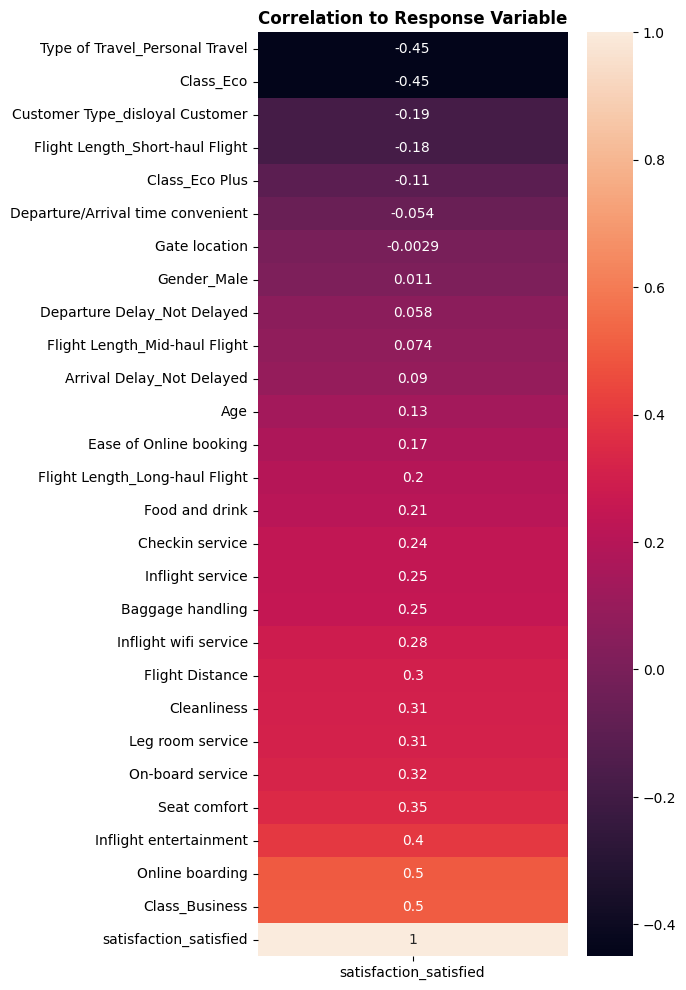

In [14]:
# Correlation matrix
fig, ax = plt.subplots(1,1)
df_corr_before = df_enc.corr()[['satisfaction_satisfied']].sort_values(by='satisfaction_satisfied')
sns.heatmap(df_corr_before, annot=True, yticklabels=df_corr_before.index, ax = ax)

fig.set_figheight(12)
fig.set_figwidth(5)

plt.title("Correlation to Response Variable", weight = "bold")

In [15]:
# Feature Selection

filter = [df_corr_before.index[i] for i in range(len(df_corr_before['satisfaction_satisfied'])) if abs(df_corr_before.values[i]) > 0.1]

df_final = df_enc[filter].copy()
df_final

,Type of Travel_Personal Travel,Class_Eco,Customer Type_disloyal Customer,Flight Length_Short-haul Flight,Class_Eco Plus,Age,Ease of Online booking,Flight Length_Long-haul Flight,Food and drink,Checkin service,...,Inflight wifi service,Flight Distance,Cleanliness,Leg room service,On-board service,Seat comfort,Inflight entertainment,Online boarding,Class_Business,satisfaction_satisfied
0,1,0,0,1,1,0.076923,3,0,5,4,...,3,0.086632,5,3,4,5,5,3,0,0
1,0,0,1,1,0,0.230769,3,0,1,1,...,3,0.041195,1,5,1,1,1,3,1,0
2,0,0,0,0,0,0.243590,2,0,5,4,...,2,0.224354,5,3,4,5,5,5,1,1
3,0,0,0,1,0,0.230769,5,0,2,1,...,2,0.107229,2,5,2,2,2,2,1,0
4,0,0,0,1,0,0.692308,3,0,4,3,...,3,0.036955,3,4,3,5,3,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,0,1,1,0,0.346154,3,0,4,4,...,3,0.099960,4,2,3,4,4,3,1,0
25972,0,0,0,1,0,0.205128,4,0,4,5,...,4,0.124192,4,5,4,4,4,4,1,1
25973,1,1,0,0,0,0.128205,1,0,2,5,...,2,0.160945,2,3,4,2,2,1,0,0
25974,0,0,0,0,0,0.089744,3,0,4,4,...,3,0.221325,4,2,3,4,4,4,1,1


## Model Building

In [16]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final.drop(['satisfaction_satisfied'], axis = 1),
                                                    df_final['satisfaction_satisfied'],
                                                    test_size = 0.3,
                                                    random_state = 39)

In [17]:
# Model Library
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Metrics
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     22028
           1       0.87      0.84      0.85     16819

    accuracy                           0.87     38847
   macro avg       0.87      0.87      0.87     38847
weighted avg       0.87      0.87      0.87     38847

ROC Score:
0.8684879552623179


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


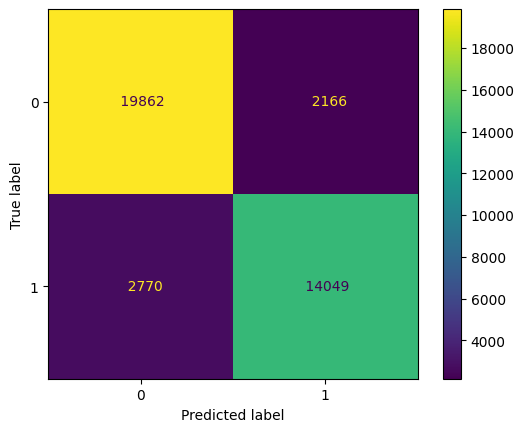

In [18]:
# Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

report_LR = classification_report(y_test, y_pred_LR)
print("Classification Report:", report_LR, sep='\n')
roc_LR = roc_auc_score(y_test, y_pred_LR)
print("ROC Score:", roc_LR, sep='\n')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR, values_format = "6d")

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     22028
           1       0.94      0.94      0.94     16819

    accuracy                           0.95     38847
   macro avg       0.94      0.94      0.94     38847
weighted avg       0.95      0.95      0.95     38847

ROC Score:
0.9445456322025835


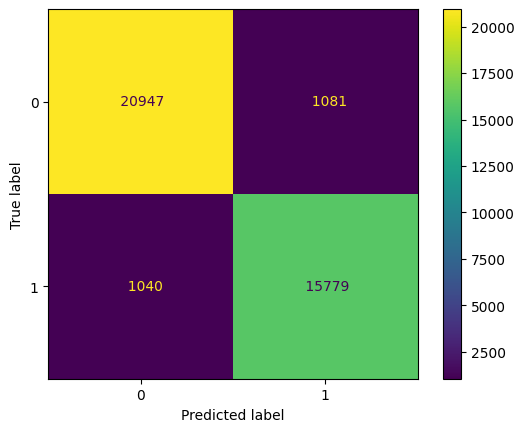

In [19]:
# Decision Tree
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

report_tree = classification_report(y_test, y_pred_tree)
print("Classification Report:", report_tree, sep='\n')
roc_tree = roc_auc_score(y_test, y_pred_tree)
print("ROC Score:", roc_tree, sep='\n')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, values_format = "6d")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     22028
           1       0.97      0.94      0.96     16819

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847

ROC Score:
0.9602352183087618


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

<Figure size 500x500 with 0 Axes>

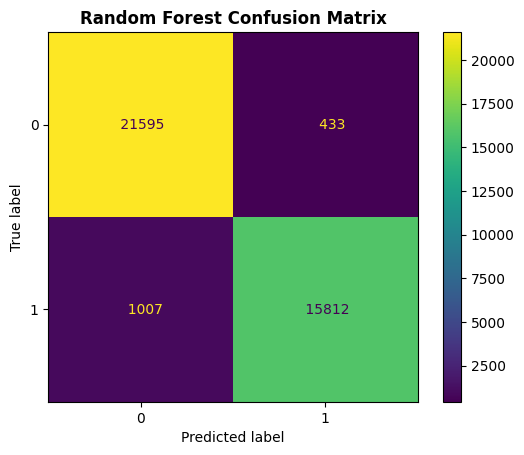

In [20]:
# Random Forest

model_RF = RandomForestClassifier(n_estimators = 100, random_state = 39)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

report_RF = classification_report(y_test, y_pred_RF)
print("Classification Report:", report_RF, sep='\n')
roc_RF = roc_auc_score(y_test, y_pred_RF)
print("ROC Score:", roc_RF, sep='\n')

fig = plt.figure()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF, values_format = "6d")
fig.set_figwidth(5)
fig.set_figheight(5)
plt.title("Random Forest Confusion Matrix", weight = "bold")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     22028
           1       0.94      0.92      0.93     16819

    accuracy                           0.94     38847
   macro avg       0.94      0.94      0.94     38847
weighted avg       0.94      0.94      0.94     38847

ROC Score:
0.938797890998806


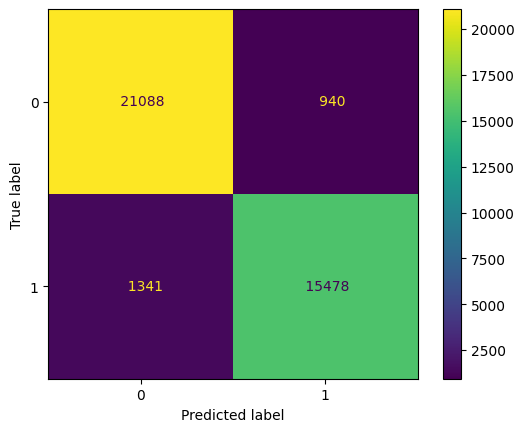

In [22]:
# Support Vector Machine
model_SV = SVC()
model_SV.fit(X_train, y_train)
y_pred_SV = model_SV.predict(X_test)

report_SV = classification_report(y_test, y_pred_SV)
print("Classification Report:", report_SV, sep='\n')
roc_SV = roc_auc_score(y_test, y_pred_SV)
print("ROC Score:", roc_SV, sep='\n')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SV, values_format = "6d")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     22028
           1       0.92      0.91      0.91     16819

    accuracy                           0.93     38847
   macro avg       0.93      0.92      0.92     38847
weighted avg       0.93      0.93      0.93     38847

ROC Score:
0.9240575356782859


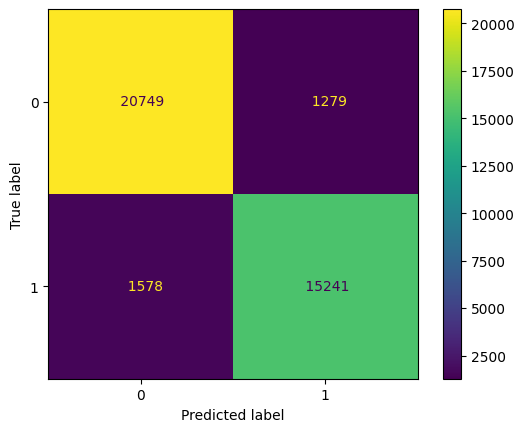

In [23]:
# Boosting - AdaBoost

adaboost_model = AdaBoostClassifier(n_estimators = 100)
adaboost_model.fit(X_train, y_train)
y_pred_AB = adaboost_model.predict(X_test)

report_AB = classification_report(y_test, y_pred_AB)
print("Classification Report:", report_AB, sep='\n')
roc_AB = roc_auc_score(y_test, y_pred_AB)
print("ROC Score:", roc_AB, sep='\n')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_AB, values_format = "6d")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     22028
           1       0.95      0.92      0.93     16819

    accuracy                           0.94     38847
   macro avg       0.94      0.94      0.94     38847
weighted avg       0.94      0.94      0.94     38847

ROC Score:
0.9394290380582814


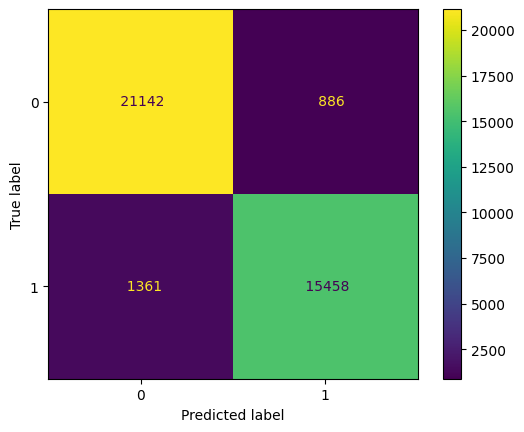

In [24]:
# Boosting - Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier()
GB_model.fit(X_train, y_train)
y_pred_GB = GB_model.predict(X_test)

report_GB = classification_report(y_test, y_pred_GB)
print("Classification Report:", report_GB, sep='\n')
roc_GB = roc_auc_score(y_test, y_pred_GB)
print("ROC Score:", roc_GB, sep='\n')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_GB, values_format = "6d")

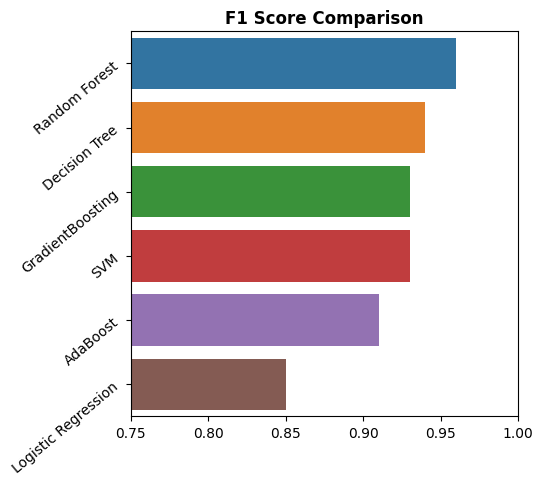

In [25]:
# F1-Score Comparison Chart

# Compare each model performance
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)

# models = [report_RF, report_tree, report_GB, report_SV, report_AB, report_LR]
# f1 = {type(model).__name__ : float(model.split()[12]) for model in }
f1 = [float(i.split()[12]) for i in [report_RF, report_tree, report_GB, report_SV, report_AB, report_LR]]

f1_plot = sns.barplot(y=["Random Forest","Decision Tree", "GradientBoosting", "SVM", "AdaBoost", "Logistic Regression"], x = f1)
f1_plot.set_yticklabels(f1_plot.get_yticklabels(), rotation=40, ha="right")
f1_plot.set_title("F1 Score Comparison", weight='bold')
f1_plot.set_xlim(left = 0.75, right = 1)
plt.show()

## Hyperparameter Tuning

In [26]:
# Hyperparameter Library

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [10, 50, 100, 200, 300, 1000],
#     'n-jobs': [-1]
# }

param_grid = {
    'bootstrap': [True],
    'max_depth': sp_randInt(50, 200),
    'max_features': sp_randInt(2, 8),
    'min_samples_leaf': sp_randInt(2, 10),
    'min_samples_split': sp_randInt(4, 16),
    'n_estimators': sp_randInt(10, 1000),
}

forest_grid = RandomizedSearchCV(estimator = model_RF, param_distributions=param_grid, n_jobs = -1)
forest_grid.fit(X_train, y_train)

In [ ]:
forest_grid.best_estimator_

In [ ]:
# Random Forest
model_HRF = RandomForestClassifier(max_depth=138, max_features=7, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=813, random_state=39)
model_HRF.fit(X_train, y_train)
y_pred_HRF = model_HRF.predict(X_test)

report_HRF = classification_report(y_test, y_pred_HRF)
print("Classification Report:", report_HRF, sep='\n')
roc_rf = roc_auc_score(y_test, y_pred_HRF)
print("ROC Score:", roc_rf, sep='\n')

In [ ]:
from sklearn.metrics import f1_score

print("Random Forest Model F1 Score")
print("Before hypertuning:", f1_score(y_test, y_pred_RF))
print("After hypertuning:", f1_score(y_test, y_pred_HRF))